In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions

$$
u'' + c(x)u = f(x) \qquad x \in \Omega 
$$
$$
u(0) =\alpha \quad u(1) = \beta
$$

In [31]:
# Define fx c(x) y f(x)
def c(x):
    return 10 * np.sin(2 * np.pi * x) + 15

def f(x):    
    return np.exp(-x) * (4 * np.pi * np.cos(2 * np.pi * x) + (4 * np.pi**2 + 14) * np.sin(2 * np.pi * x) + 5 - 5 * np.cos(4 * np.pi * x))

# Exact sol for reference
def exact_solution(x):
    return np.exp(-x) * np.sin(2 * np.pi * x)


# FDM implementation 1 (less efficient)

In [32]:
# # FDM
# def finite_difference(n):
#     h = 1 / (n + 1)
#     x = np.linspace(0, 1, n + 2)
#     A = np.zeros((n, n))
#     b = np.zeros(n)
    
#     # Assemble A and b
#     for i in range(1, n+1):
#         xi = i * h
#         A[i-1, i-1] = 2 / h**2 + c(xi)
#         if i > 1:
#             A[i-1, i-2] = -1 / h**2
#         if i < n:
#             A[i-1, i] = -1 / h**2
#         b[i-1] = f(xi)
    
#     # Solve linear system A*u = b
#     u = np.linalg.solve(A, b)
    
#     # Include boundary conditions
#     u = np.concatenate(([0], u, [0]))
#     x = np.linspace(0, 1, n + 2)
#     return x, u



# FDM implementation 2

In [33]:
# FDM
def finite_difference(n):
    h = 1 / (n + 1)
    x = np.linspace(0, 1, n + 2)
    b = np.zeros(n)
    c_ = np.zeros(n)
    
    # assemble A and b
    for i in range(1, n+1):
        xi = i * h
        c_[i-1] = c(xi)
        b[i-1] = f(xi)
    
    A = (2*np.diag(np.ones(n),k=0) - 1*np.diag(np.ones(n-1),k=1) - 1*np.diag(np.ones(n-1), k=-1)) / (h**2) + np.diag(c_, k=0)
    
    # Solve linear system A*u = b
    u = np.linalg.solve(A, b)
    
    # Include boundary conditions
    u = np.concatenate(([0], u, [0]))
    return x, u



# Create plotters

In [34]:
# Graph sol
def plot_solution(n):
    x_exact = np.linspace(0, 1, 10000)
    u_exact = exact_solution(x_exact)
    
    x_fd, u_fd = finite_difference(n)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_fd, u_fd, 'o-', label='Solution by FDM (n={})'.format(n), c='darkorange')
    plt.plot(x_exact, u_exact, label='Exact solution')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('Comparison between exact solution and FDM approximation')
    plt.legend()
    plt.grid(True)
    plt.show()



$$
\left | u_h - u \right | = O(h^2) 
$$
$$
\Leftrightarrow \left | u_h - u \right | \leq C h^2 
$$
$$
\Leftrightarrow \log \left | u_h - u \right | \leq \log(C h^2)
$$
$$
\Leftrightarrow \log \left | u_h - u \right | \leq \log(C) +  \log(h^2)
$$
$$
\Leftrightarrow \log \left | u_h - u \right | \leq \log(C) +  2\log(h) = a + m \log(h)
$$

In [35]:
# Convergence analysis
def convergence_analysis():
    ns = [5, 10, 20, 40, 80, 160, 320, 640, 1280]
    errors = []

    for n in ns:
        x_fd, u_fd = finite_difference(n)
        u_exact = exact_solution(x_fd)
        error = np.linalg.norm(u_fd - u_exact, ord=np.inf)
        errors.append(error)

    slope, _ = np.polyfit(np.log(ns), np.log(errors), 1) # log-log error
    
    #plt.plot(np.arange(len(ns)), np.log(errors))
    plt.figure(figsize=(10, 6))
    plt.loglog(ns, errors, 'o-', label=f'Slope = {slope}')
    plt.xlabel('Number of intervals (n)')
    plt.ylabel('Error')
    plt.title('Error convergence')
    plt.legend()
    plt.grid(True, which='both', linestyle='--')
    plt.show()

# Plot results

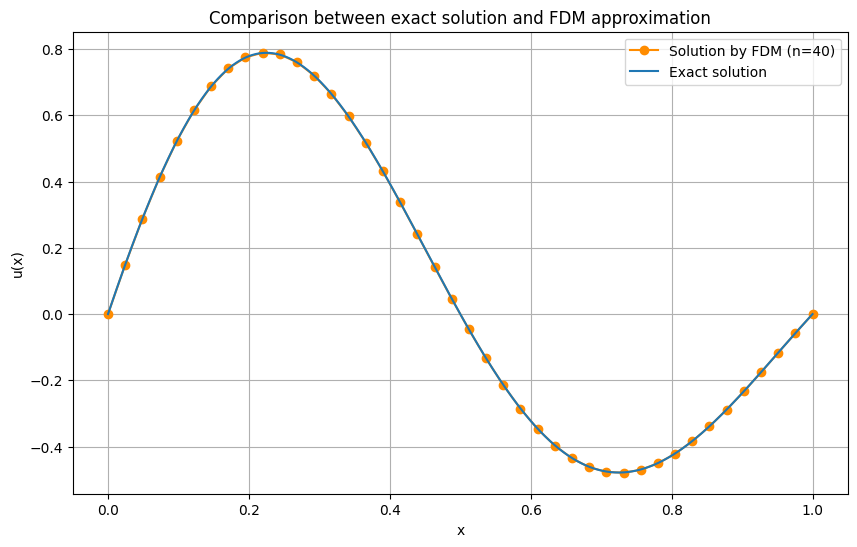

In [36]:
plot_solution(40)

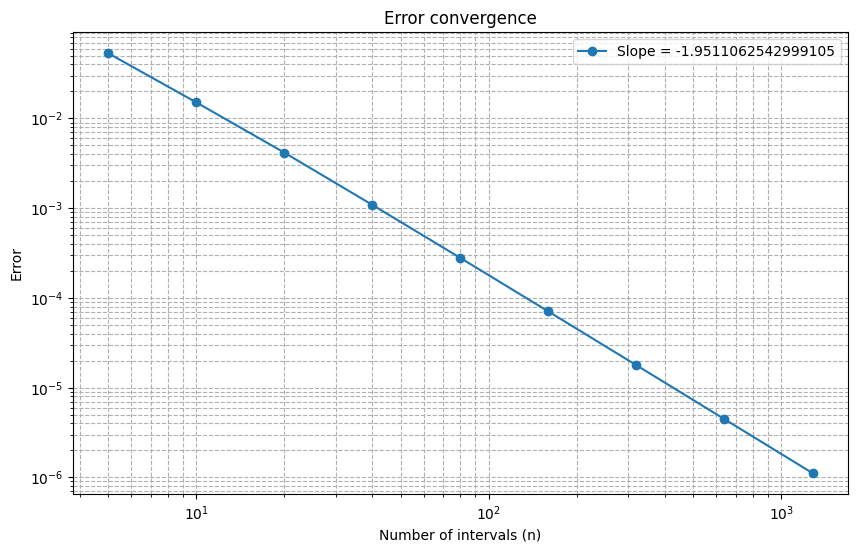

In [37]:
convergence_analysis()